In [ ]:
pip install pycaret[full]==2.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 266 kB 7.3 MB/s 
     |████████████████████████████████| 268 kB 49.0 MB/s 
     |████████████████████████████████| 1.3 MB 58.3 MB/s 
     |████████████████████████████████| 16.9 MB 42.2 MB/s 
     |████████████████████████████████| 14.8 MB 39.8 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 2.0 MB 42.1 MB/s 
     |████████████████████████████████| 88 kB 5.9 MB/s 
     |████████████████████████████████| 167 kB 47.8 MB/s 
     |████████████████████████████████| 137 kB 49.8 MB/s 
     |████████████████████████████████| 3.4 MB 41.6 MB/s 
     |████████████████████████████████| 10.4 MB 42.6 MB/s 
     |████████████████████████████████| 1.7 MB 15.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing whee

In [8]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
from sklearn.datasets import make_blobs

mpl.rcParams['figure.dpi'] = 300

In [24]:
# edit csv location

data = pd.read_csv('/content/Sablayan_Data.csv')
data.drop(['Unnamed: 0'], axis=1)

,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI
0,22,Ligaya,PH175109009,Brush/Shrubs,0,0.000000,1,1,0,0,2.0,1,0.000000
1,23,Burgos,PH175109009,Brush/Shrubs,0,0.000000,0,0,0,0,2.0,1,0.000000
2,49,Pag-Asa,PH175109004,NaN,0,154.538807,0,0,3,2,0.0,0,1151.197170
3,50,San Agustin,PH175109004,Built Up,0,214.812672,0,0,3,2,0.0,0,1600.191852
4,51,San Agustin,PH175109004,Grassland,0,302.902705,0,0,3,1,0.0,1,2469.775420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1362,Pag-Asa,PH175109003,Open Forest,0,8.598491,0,0,0,0,3.0,0,117.376229
968,1363,Pag-Asa,PH175109003,Brush/Shrubs,0,16.884621,0,0,0,0,3.0,1,235.553869
969,1364,Pag-Asa,PH175109003,NaN,0,21.536779,0,0,0,0,3.0,0,293.994123
970,1397,Pag-Asa,PH175109003,NaN,0,0.000000,0,0,0,0,3.0,0,0.000000


In [17]:
cluster = setup(data, session_id = 7652)

,Description,Value
0,session_id,7652
1,Original Data,"(972, 14)"
2,Missing Values,True
3,Numeric Features,4
4,Categorical Features,10
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(972, 104)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Unnamed: 0'],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_num...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                (

In [18]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.518,1260.5396,0.5691,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


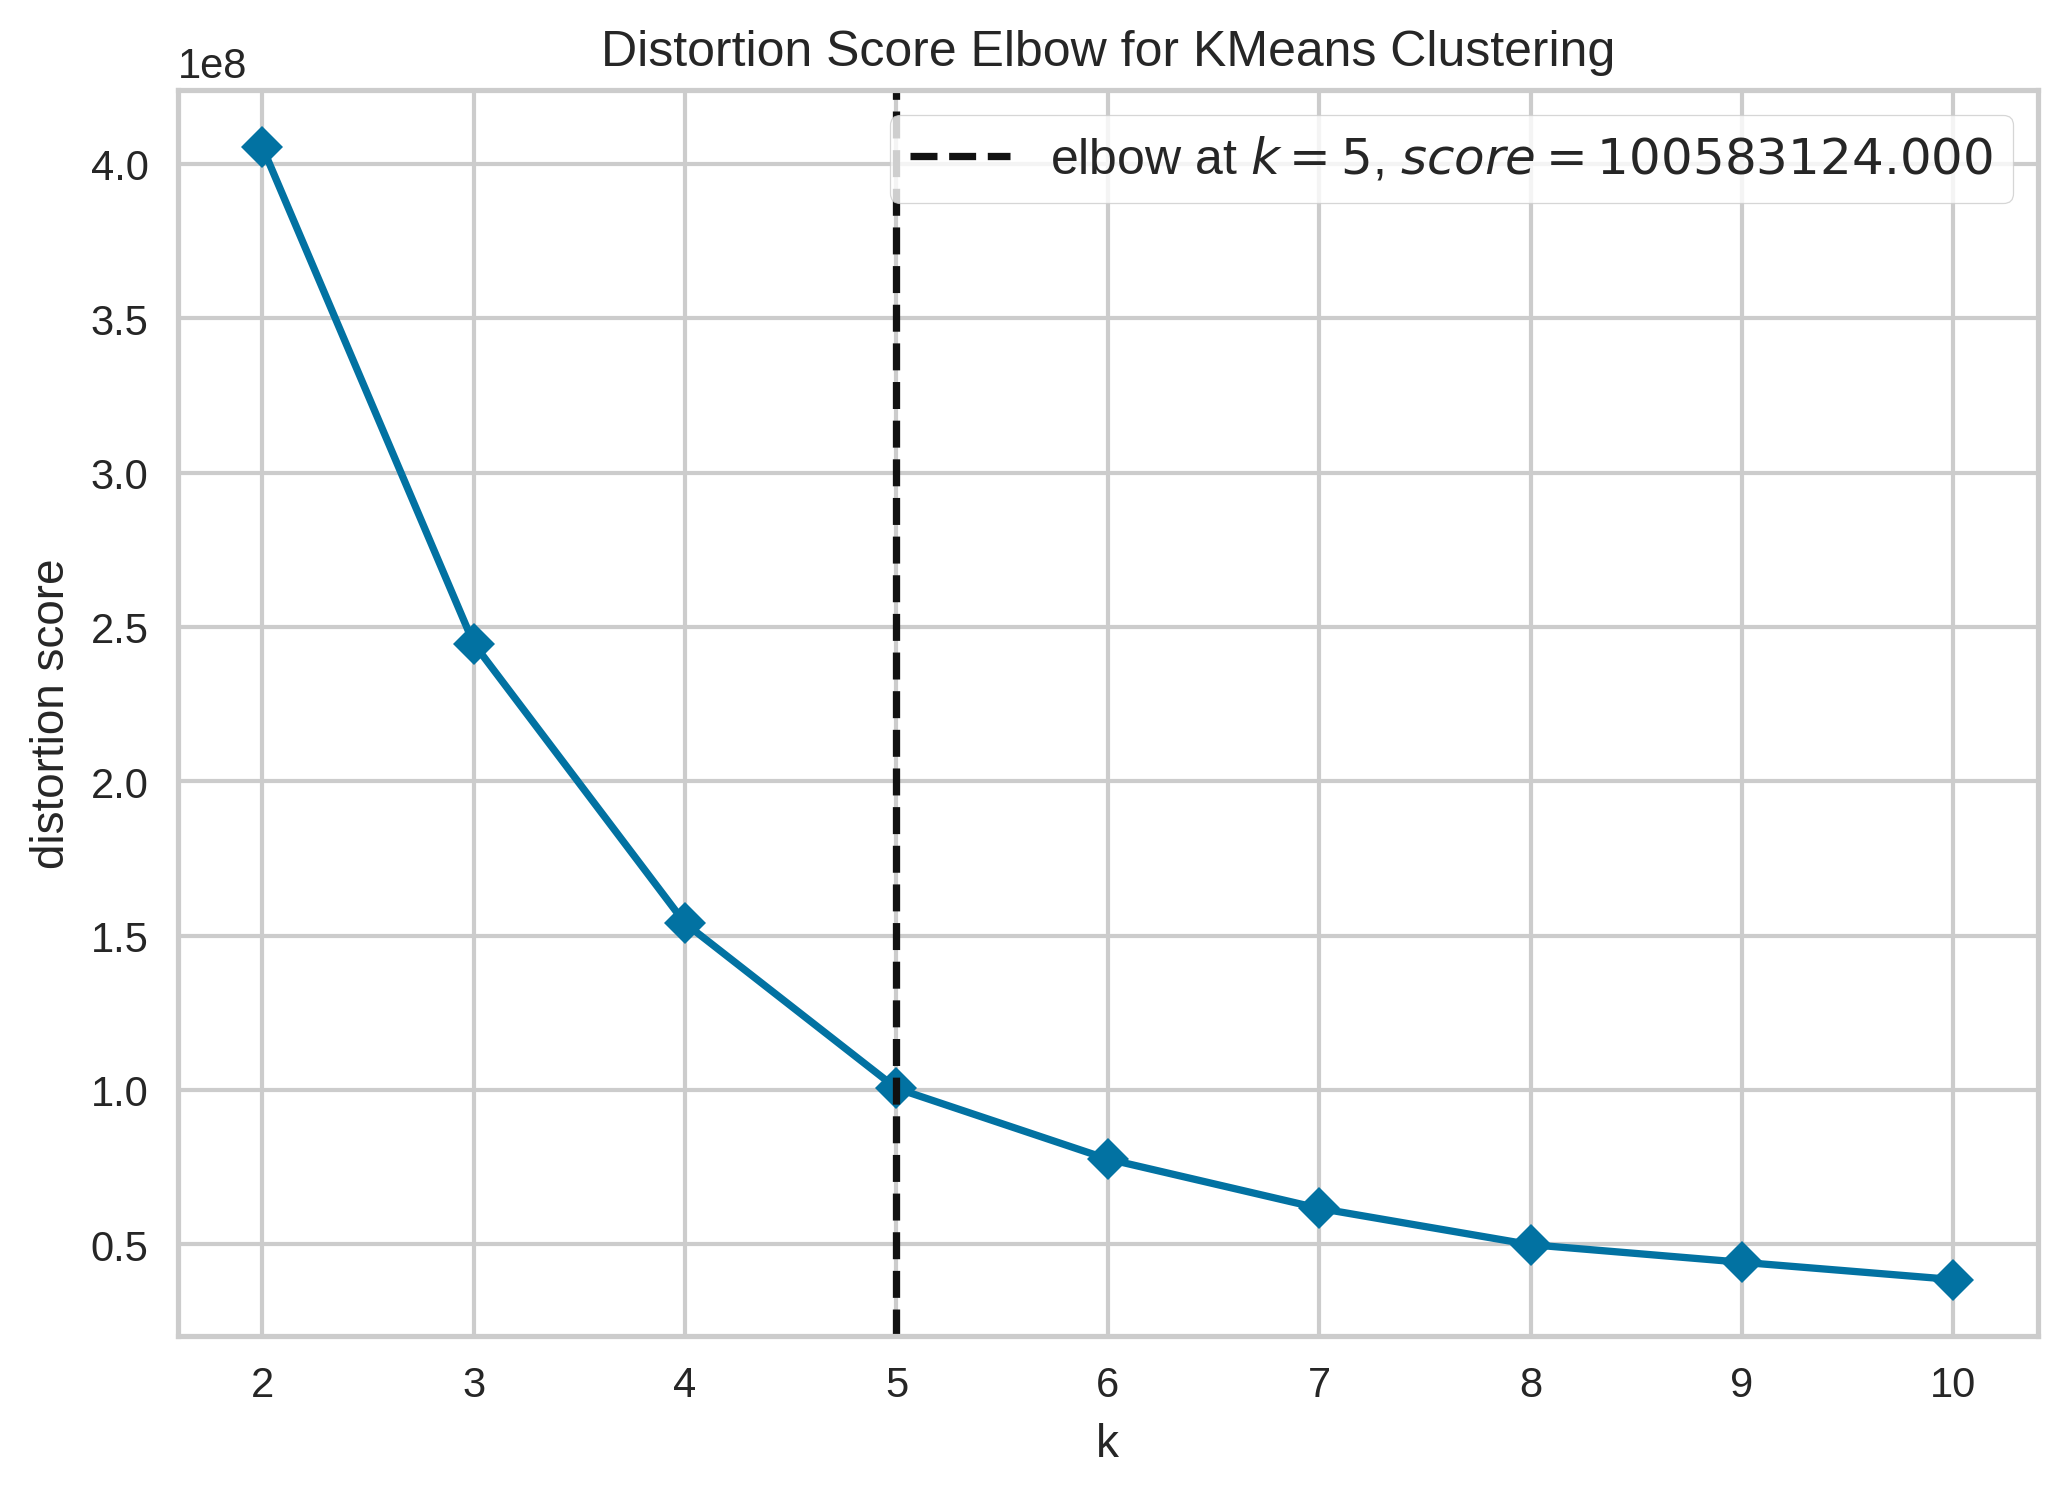

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
plot_model(model, 'elbow')

In [20]:
model = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4568,1575.0075,0.5681,0,0,0


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [21]:
plot_model(model, 'cluster')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [22]:
save_model(model, 'clustering_model')

results = assign_model(model)
results.head(10)

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7652, tol=0.0001, verbose=0), model_name=clustering_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Unnamed: 0'],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                             

Transformation Pipeline and Model Successfully Saved


INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7652, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(972, 15)
INFO:logs:assign_model() succesfully completed......................................


,Unnamed: 0,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster
0,0,22,Ligaya,PH175109009,Brush/Shrubs,0,0.000000,1,1,0,0,2.0,1,0.000000,Cluster 3
1,1,23,Burgos,PH175109009,Brush/Shrubs,0,0.000000,0,0,0,0,2.0,1,0.000000,Cluster 3
2,2,49,Pag-Asa,PH175109004,NaN,0,154.538807,0,0,3,2,0.0,0,1151.197170,Cluster 1
3,3,50,San Agustin,PH175109004,Built Up,0,214.812672,0,0,3,2,0.0,0,1600.191852,Cluster 1
4,4,51,San Agustin,PH175109004,Grassland,0,302.902705,0,0,3,1,0.0,1,2469.775420,Cluster 4
5,5,58,Burgos,PH175109009,Built Up,0,1243.892810,13,1,3,2,2.0,0,5967.815673,Cluster 4
6,6,59,Burgos,PH175109009,NaN,0,0.000000,0,0,3,2,2.0,0,0.000000,Cluster 3
7,7,84,San Agustin,PH175109004,Annual Crop,0,82.983351,0,0,3,2,0.0,0,618.163167,Cluster 3
8,8,85,San Agustin,PH175109004,Annual Crop,0,75.068148,0,1,3,2,0.0,0,581.721342,Cluster 3
9,9,86,Batong Buhay,PH175109004,inland water,0,164.860949,4,1,3,3,0.0,0,1418.065842,Cluster 1
